In [1]:
import os
import csv
import pandas as pd
import datetime
from IPython.display import display

#from natsort import natsorted # May need to install this using pip
import sys
# sys.version
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly

In [2]:
import plotly.plotly as py
#from plotly.graph_objs import *
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
plotly.offline.init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.linear_model import LinearRegression as sklearnLinReg
from sklearn.model_selection import train_test_split


In [3]:
path = 'C:\\Users\\ppsheehy\\Documents\\GitHub\\Projects\\Kaggle\\PortoSeguro\\Data\\'
file = 'train.csv'

fpath = path + file

In [175]:
chunksize = 500000

df = pd.read_csv(fpath, skiprows= 0,  chunksize=chunksize, delimiter=',')
                 
                 
#                  , usecols=[0,4,5,6,7,8,9,10,11], 
#                          names = ['Time','V0', 'V1','V2', 'V3', 'V4', 'V5', 'V6', 'V7'] )

df = df.get_chunk()
len(df)

500000

# xgboost

In [199]:
def eval_gini(y_true, y_prob):
    """
    Original author CPMP : https://www.kaggle.com/cpmpml
    In kernel : https://www.kaggle.com/cpmpml/extremely-fast-gini-computation
    """
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = eval_gini(labels, preds)
    return [('gini', gini_score)]

In [239]:
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, accuracy_score
dataset = df#[0:20000]
# split data into X and y
Y = dataset['target'] #dataset[:,0:8]
X = dataset.drop(['id', 'target'], axis=1)#dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier(scale_pos_weight=30)
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))

Accuracy: 52.45%
Recall: 67.57%


# XGB Play

In [225]:
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, accuracy_score
dataset = df[0:20000]
# split data into X and y
Y = dataset['target'] #dataset[:,0:8]
X = dataset.drop(['id', 'target'], axis=1)#dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier(scale_pos_weight=30, objective='binary:logistic')
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
predictions = [value for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))

Accuracy: 65.67%
Recall: 50.20%


In [217]:
y_pred


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [201]:
import numpy as np
import xgboost as xgb

data = np.random.rand(7,10)
label = np.random.randint(2,size=7)
#print data
#print label

dtrain = xgb.DMatrix(data, label=label)
param = {'bst:max_depth':2, 'bst:eta':1, 'silent':1, 'objective':'binary:logistic' }
plst = param.items()

bst = xgb.train(plst,dtrain,)

dtest= xgb.DMatrix(np.random.rand(4,10))
ypred = bst.predict(dtest)

print (ypred)

[ 0.19650546  0.19650546  0.19650546  0.19650546]


In [238]:
len(X_test)

6600

In [240]:
import xgboost as xg
max_depth = 3
min_child_weight = 10
subsample = 0.5
colsample_bytree = 0.6
objective = 'binary:logistic'
num_estimators = 100
learning_rate = 0.3

for s in [30, 36, 40]:

    features = X_train #df[feature_columns]
    target = y_train #df[target_columns]
    clf = xg.XGBClassifier(max_depth=max_depth,
                    min_child_weight=min_child_weight,
                    subsample=subsample,
                    colsample_bytree=colsample_bytree,
                    objective=objective,
                    n_estimators=num_estimators,
                    learning_rate=learning_rate, scale_pos_weight=s
                      )
    clf.fit(features, target)

    y = clf.predict(X_test)
    print(s, eval_gini(y_test, y))

30 0.189998618471
36 0.165203658006
40 0.146044771266


In [227]:
eval_gini(y_test, y_pred)

0.19002225244862303

In [205]:
dtrain.get_label()

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.], dtype=float32)

In [226]:
z = list(zip(y_test, y_pred))
for i in z:
    if i[0]==1:
        print(i)

(1, 1)
(1, 0)
(1, 1)
(1, 1)
(1, 0)
(1, 0)
(1, 1)
(1, 0)
(1, 0)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(1, 1)
(1, 1)
(1, 0)
(1, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 0)
(1, 1)
(1, 1)
(1, 0)
(1, 0)
(1, 0)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 1)
(1, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 0)
(1, 1)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(1, 0)
(1, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(1, 0)
(1, 0)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(1, 1)
(1, 1)
(1, 0)
(1, 0)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(1, 0)
(1, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 1)
(1, 1)
(1, 0)
(1, 1)
(1, 1)
(1, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(1, 0)
(1, 1)
(1, 1)
(1, 0)
(1, 1)
(1, 1)
(1, 0)
(1, 1)
(1, 1)
(1, 0)
(1, 0)

In [198]:
f = list(zip(df.columns, model.feature_importances_))
sorted(f, key=lambda x: x[1]

[('ps_ind_05_cat', 0.0),
 ('ps_ind_08_bin', 0.0),
 ('ps_ind_09_bin', 0.0),
 ('ps_ind_10_bin', 0.0),
 ('ps_ind_11_bin', 0.0),
 ('ps_car_01_cat', 0.0),
 ('ps_calc_13', 0.0),
 ('ps_calc_15_bin', 0.0),
 ('ps_calc_16_bin', 0.0),
 ('ps_ind_12_bin', 0.0016207455),
 ('ps_ind_16_bin', 0.0016207455),
 ('ps_car_06_cat', 0.0016207455),
 ('ps_car_07_cat', 0.0016207455),
 ('ps_calc_06', 0.0016207455),
 ('ps_ind_14', 0.003241491),
 ('ps_calc_14', 0.003241491),
 ('ps_ind_04_cat', 0.0064829821),
 ('ps_car_02_cat', 0.0064829821),
 ('ps_calc_07', 0.0064829821),
 ('ps_reg_03', 0.0081037274),
 ('ps_ind_02_cat', 0.0097244736),
 ('ps_ind_07_bin', 0.0097244736),
 ('ps_ind_15', 0.0097244736),
 ('ps_car_03_cat', 0.0097244736),
 ('ps_calc_18_bin', 0.0097244736),
 ('target', 0.011345219),
 ('ps_car_05_cat', 0.012965964),
 ('ps_calc_11', 0.012965964),
 ('ps_calc_17_bin', 0.012965964),
 ('ps_ind_06_bin', 0.014586709),
 ('ps_car_08_cat', 0.014586709),
 ('ps_calc_03', 0.014586709),
 ('ps_car_10_cat', 0.016207455),
 (

In [178]:
y_test

1072    0
1048    0
204     0
694     0
1758    0
284     0
1866    0
1926    0
1886    1
1724    0
868     0
1891    0
1782    0
1703    0
802     0
1302    0
1274    0
1037    0
595     0
1912    0
1824    0
1028    0
350     0
1089    0
2       0
1075    0
1504    0
110     0
1062    0
108     1
       ..
658     0
755     0
1352    1
522     0
264     1
1303    0
1767    0
1580    0
631     1
498     0
1635    0
1319    0
1649    0
1015    0
432     0
1149    0
1701    0
68      0
1906    0
660     0
1190    0
992     0
573     0
334     0
338     0
1027    0
383     0
1493    0
55      0
681     0
Name: target, Length: 660, dtype: int64

In [110]:
dft = df[0:50000]
cdict = {}
#c = [cdict[c]=set(dft[c]) 
# for c in dft:
    
#      cdict[c]=set(dft[c])

dft.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [116]:
dft_cat = dft.filter(regex = 'cat')
dft_bin = dft.filter(regex = 'bin')


In [125]:
cdict={}
for c in dft_cat:    
     cdict[c]=set(dft_cat[c])
for k,v in cdict.items():
    print(k,len(v))

ps_ind_02_cat 5
ps_ind_04_cat 3
ps_ind_05_cat 8
ps_car_01_cat 13
ps_car_02_cat 2
ps_car_03_cat 3
ps_car_04_cat 10
ps_car_05_cat 3
ps_car_06_cat 18
ps_car_07_cat 3
ps_car_08_cat 2
ps_car_09_cat 6
ps_car_10_cat 3
ps_car_11_cat 104


In [127]:
cdict={}
for c in dft_bin:    
     cdict[c]=set(dft_bin[c])
for k,v in cdict.items():
    print(k,len(v))

ps_ind_06_bin 2
ps_ind_07_bin 2
ps_ind_08_bin 2
ps_ind_09_bin 2
ps_ind_10_bin 2
ps_ind_11_bin 2
ps_ind_12_bin 2
ps_ind_13_bin 2
ps_ind_16_bin 2
ps_ind_17_bin 2
ps_ind_18_bin 2
ps_calc_15_bin 2
ps_calc_16_bin 2
ps_calc_17_bin 2
ps_calc_18_bin 2
ps_calc_19_bin 2
ps_calc_20_bin 2


In [128]:
dft.replace(-1,np.nan, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [140]:
dft[0:20].to_csv('c:\\users\\ppsheehy\\documents\\porto.csv')

In [137]:
dft[dft['target']==1]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
9,28,1,1,1.0,2,0.0,0.0,0,1,0,...,3,5,0,6,0,1,0,0,1,0
19,64,1,0,1.0,2,1.0,0.0,1,0,0,...,10,3,1,11,0,1,1,0,1,0
28,84,1,0,2.0,0,1.0,4.0,1,0,0,...,3,2,0,8,0,1,1,0,0,0
39,107,1,2,1.0,3,1.0,0.0,0,0,1,...,6,0,8,14,0,1,0,1,0,0
41,110,1,5,2.0,1,0.0,0.0,0,0,1,...,5,2,0,7,1,1,0,0,0,0
65,162,1,6,1.0,3,0.0,0.0,0,1,0,...,3,2,3,16,0,0,0,0,0,0
87,217,1,1,1.0,5,1.0,0.0,0,1,0,...,9,1,1,6,0,1,0,0,0,0
108,285,1,0,1.0,3,0.0,0.0,1,0,0,...,9,2,5,7,0,0,0,0,0,0
191,484,1,3,1.0,8,0.0,0.0,1,0,0,...,5,3,2,7,0,1,1,1,1,0
224,563,1,7,2.0,1,0.0,6.0,0,0,0,...,6,1,2,8,0,1,0,0,1,0


In [96]:
dft[dft['ps_ind_05_cat'].isnull()]#.count()
#dft#.count()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
152,404,0,2,2.0,1,0.0,NaN,0,0,0,...,6,2,3,7,0,1,1,1,1,0
188,478,0,0,2.0,1,1.0,NaN,0,0,1,...,3,1,1,3,0,1,1,0,0,1
218,545,0,0,1.0,0,0.0,NaN,1,0,0,...,4,4,1,12,0,0,1,1,0,0
249,627,1,0,2.0,1,1.0,NaN,0,1,0,...,8,1,2,10,0,1,0,0,0,0
609,1602,0,0,1.0,0,0.0,NaN,0,1,0,...,8,0,3,6,1,1,1,0,1,0
659,1721,0,0,2.0,1,0.0,NaN,1,0,0,...,6,1,1,7,0,1,1,0,0,0
721,1859,0,0,1.0,0,0.0,NaN,1,0,0,...,8,2,3,7,0,1,0,0,0,0
778,2003,0,1,2.0,0,1.0,NaN,0,0,0,...,6,1,6,5,0,1,0,0,0,0
847,2210,0,5,NaN,0,NaN,NaN,0,1,0,...,5,2,2,9,0,0,0,0,0,0
898,2336,0,2,2.0,0,0.0,NaN,0,1,0,...,3,1,1,7,0,1,1,1,0,0


In [56]:
dft.filter(regex = 'calc')

,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
5,0.7,0.8,0.4,3,1,8,2,11,3,8,4,2,0,9,0,1,0,1,1,1
6,0.2,0.6,0.5,2,2,8,1,8,3,10,3,0,0,10,0,1,0,0,1,0
7,0.1,0.5,0.1,1,2,7,1,6,1,13,7,1,3,6,1,0,1,0,1,0
8,0.9,0.8,0.6,3,1,7,3,9,4,11,4,2,1,5,0,1,0,0,0,1
9,0.7,0.8,0.8,2,2,8,2,9,1,11,3,5,0,6,0,1,0,0,1,0


In [6]:
#df['target']

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['id', 'target'], axis=1), df['target'], test_size=0.33, random_state=42)

In [108]:
# y = df['target']
# X = df.filter(regex=('ps'))  #Only OES variables

In [109]:
import time
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# iris = datasets.load_iris()
# X, y = iris.data, iris.target

# y = Y_trainf #df['target']
# X = df.filter(regex=('ps'))

X_train = np.repeat(X_train.values, 100, axis=0)
Y_train = np.repeat(Y_train.values, 100, axis=0)
start = time.time()
print('Start')
# clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'))
# clf.fit(X, y)
# end = time.time()
# print ("Single SVC", end - start, clf.score(X,y))
# proba = clf.predict_proba(X)

# n_estimators = 10
# start = time.time()
# clf_bag = OneVsRestClassifier(BaggingClassifier(SVC(kernel='rbf', probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
# clf_bag.fit(X_train, Y_train)
# end = time.time()
# print ("Bagging SVC", end - start, clf_bag.score(X_test,Y_test))
# proba_bag = clf_bag.predict_proba(X_test)

start = time.time()
clf_rf = RandomForestClassifier(min_samples_leaf=100)
clf_rf.fit(X_train,Y_train)
end = time.time()
print ("Random Forest", end - start, clf_rf.score(X_test,Y_test))
proba_rf = clf_rf.predict_proba(X_test)


Start
Random Forest 102.92615628242493 0.963212121212


In [112]:
#y_pred_bag = clf_bag.predict(X_test)
y_pred_rf = clf_rf.fit(X_train, Y_train).predict(X_test)

#y_pred = classifier.fit(X_train, y_train).predict(X_test)

In [115]:
zz=[]
z = zip(Y_test, proba_rf)
for i, j in z:
    zz.append([i,j[1]])


In [116]:
zz

[[0, 0.069969040247678013],
 [0, 0.064444444444444443],
 [0, 0.046285714285714284],
 [0, 0.033222591362126248],
 [0, 0.0],
 [0, 0.032758620689655168],
 [0, 0.0],
 [0, 0.04791666666666667],
 [0, 0.0],
 [0, 0.0],
 [0, 0.0],
 [1, 0.0],
 [0, 0.0],
 [0, 0.0],
 [0, 0.05128205128205128],
 [0, 0.0],
 [0, 0.049295774647887328],
 [0, 0.0],
 [0, 0.0],
 [0, 0.10149853469893351],
 [0, 0.0],
 [0, 0.0],
 [0, 0.16684913450842762],
 [0, 0.048958333333333333],
 [0, 0.040514469453376209],
 [0, 0.0],
 [0, 0.0],
 [0, 0.10000000000000001],
 [0, 0.10000000000000001],
 [0, 0.0],
 [0, 0.0],
 [0, 0.15471698113207549],
 [0, 0.050289017341040465],
 [0, 0.069178082191780815],
 [0, 0.03470790378006873],
 [0, 0.1519047619047619],
 [0, 0.0],
 [0, 0.077916088635596709],
 [0, 0.0],
 [0, 0.10000000000000001],
 [0, 0.14545454545454545],
 [0, 0.053591160220994472],
 [0, 0.14719626168224301],
 [0, 0.050526315789473683],
 [0, 0.2576051813444678],
 [0, 0.046305418719211823],
 [0, 0.0],
 [0, 0.0],
 [0, 0.050510204081632648],


Confusion matrix, without normalization
[[15893     0]
 [  607     0]]
Normalized confusion matrix
[[ 1.  0.]
 [ 1.  0.]]


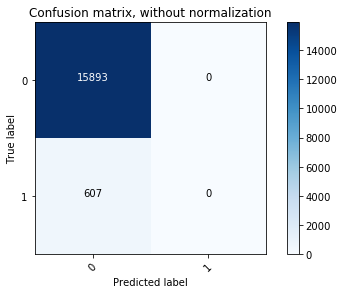

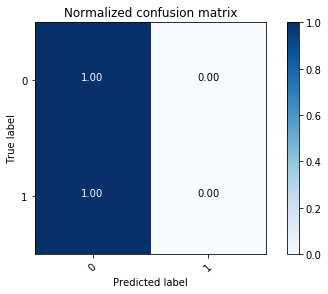

In [113]:
cnf_matrix = confusion_matrix(Y_test, y_pred_rf)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=[0,1], #class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

#plt.show()

array([[ 0.93,  0.07],
       [ 0.94,  0.06],
       [ 0.95,  0.05],
       ..., 
       [ 1.  ,  0.  ],
       [ 0.91,  0.09],
       [ 1.  ,  0.  ]])

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    0.62  0.38]
 [ 0.    0.    1.  ]]


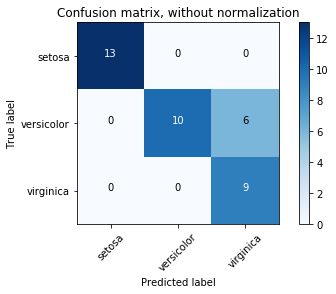

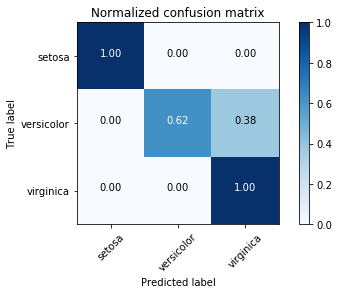

In [55]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

#plt.show()

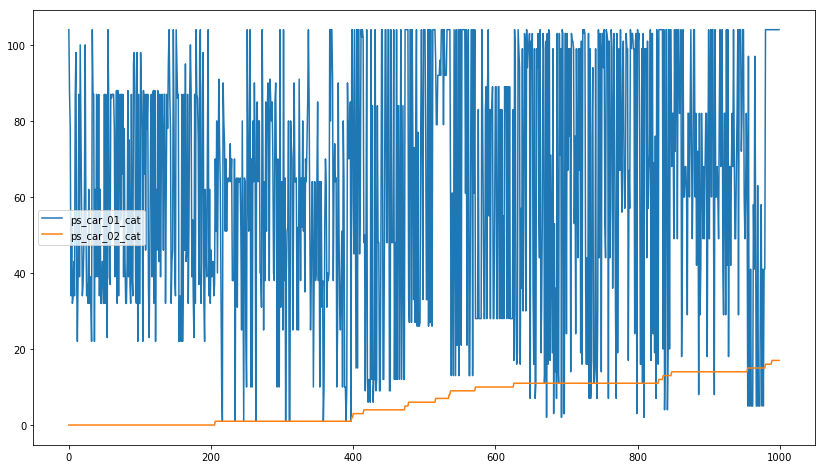

In [39]:
plt.figure(figsize=[14,8])
sorted_data = car_data.sort_values('ps_car_11_cat')
sorted_data = car_data.sort_values('ps_car_06_cat')
xr = range(0, len(car_data))
plt.plot(xr, sorted_data[['ps_car_11_cat', 'ps_car_06_cat']]);
#sorted_data
#car_data.sort_values('ps_car_11_cat')
plt.legend(car_data.columns)

In [37]:
sorted_data

,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
539,7,1,1,2,0,1,1,1,2,1,1,0,0.374166,0.879061,0.336155,3.464102
880,7,1,-1,2,-1,1,1,1,2,1,1,0,0.374166,0.888279,0.418927,3.464102
955,6,1,-1,2,0,1,1,1,0,1,1,0,0.424264,0.885687,0.418927,3.162278
193,7,1,-1,2,-1,1,1,1,2,1,1,0,0.424264,0.861217,0.418927,3.162278
47,7,1,0,2,0,1,1,1,2,1,1,0,0.424264,0.970782,0.346843,3.605551
228,6,1,-1,2,0,1,1,1,0,1,1,0,0.424264,0.916425,0.418927,3.316625
612,4,1,-1,2,1,1,1,1,0,1,1,0,0.424264,0.966987,0.418927,3.464102
822,6,1,-1,2,1,1,1,1,0,1,1,0,0.374166,0.866872,0.418927,3.464102
985,11,1,-1,2,-1,1,1,1,2,1,1,0,0.424264,0.946039,0.430813,3.464102
440,7,1,-1,2,-1,1,1,1,1,1,1,0,0.374166,0.832650,0.418927,3.464102


In [49]:
df_floats = df.loc[:,df.dtypes == 'float64']
df_floats['targ'] = df['target']
df_floats

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,targ
0,0.7,0.2,0.718070,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,0
1,0.8,0.4,0.766078,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,0
2,0.0,0.0,-1.000000,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,0
3,0.9,0.2,0.580948,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,0
4,0.7,0.6,0.840759,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,0
5,0.9,1.8,2.332649,0.445982,0.879049,0.406202,3.000000,0.7,0.8,0.4,0
6,0.6,0.1,0.617454,0.316228,0.639683,0.368782,3.162278,0.2,0.6,0.5,0
7,0.7,0.4,0.607248,0.446990,0.900574,0.374833,3.316625,0.1,0.5,0.1,0
8,0.9,0.7,0.901388,0.400000,0.780641,0.407431,2.828427,0.9,0.8,0.6,0
9,0.9,1.4,2.316652,0.447214,1.458184,0.390256,3.605551,0.7,0.8,0.8,1


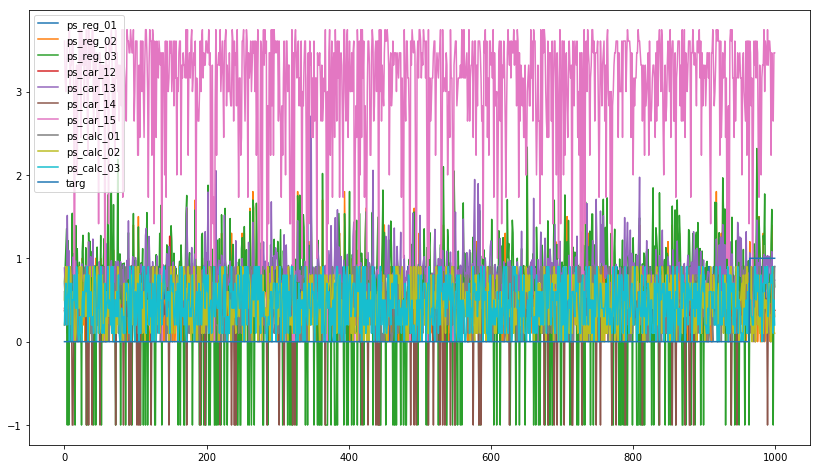

In [56]:
plt.figure(figsize=[14,8])

plt.plot(range(0,len(df_floats)), df_floats.sort_values('targ'));

plt.legend(df_floats.columns);

In [102]:
y = df['target']
X = df.filter(regex=('ps'))

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)

# rf.fit(df.drop(['id', 'target'],axis=1), df['target'])
# features = df.drop(['id', 'target'],axis=1).columns.values


rf.fit(test, df['target'])
features = test.columns.values


print("----- Training Done -----")


# rf.fit(train.drop(['id', 'target'],axis=1), train.target)
# features = train.drop(['id', 'target'],axis=1).columns.values
# print("----- Training Done -----")

----- Training Done -----


,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,False,True,False,False,False,...,9,1,5,8,False,True,True,False,False,True
1,1,1,7,0,0,False,False,True,False,False,...,3,1,1,9,False,True,True,False,True,False
2,5,4,9,1,0,False,False,True,False,False,...,4,2,7,7,False,True,True,False,True,False
3,0,1,2,0,0,True,False,False,False,False,...,2,2,4,9,False,False,False,False,False,False
4,0,2,0,1,0,True,False,False,False,False,...,3,1,1,3,False,False,False,True,True,False
5,5,1,4,0,0,False,False,False,True,False,...,4,2,0,9,False,True,False,True,True,True
6,2,1,3,1,0,False,True,False,False,False,...,3,0,0,10,False,True,False,False,True,False
7,5,1,4,0,0,True,False,False,False,False,...,7,1,3,6,True,False,True,False,True,False
8,5,1,3,1,0,False,False,True,False,False,...,4,2,1,5,False,True,False,False,False,True
9,1,1,2,0,0,False,True,False,False,False,...,3,5,0,6,False,True,False,False,True,False


In [104]:
#rf.feature_importances_


In [105]:
#plt.bar(range(0, len(X.columns)),rf.feature_importances_)

In [137]:
colorscale = 'Portland'
traces = []
#trace = go.Scatter3d(
trace = go.Bar(
    x=list(X.columns),
    y=rf.feature_importances_,
    #z=Y_sklearn[:,2],
#     mode='markers',
#     name=name,
#     marker=Marker(
#         size=8,
#         color=Y,
#         colorscale=colorscale,
#         line=Line(
#             #color='rgba(217, 217, 217, 0.14)',
#             color=Y,
#             colorscale=colorscale,
#             width=0.5),
#         opacity=0.8)
)
traces.append(trace)
data = go.Data(traces)
layout = go.Layout(
    margin=dict(l=0, r=0, b=95, t=0),
        scene=go.Scene(
        xaxis=go.XAxis(title='PC1'),
        yaxis=go.YAxis(title='PC2'),
        #zaxis=ZAxis(title='PC3')
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [125]:

#df.columns
rf.feature_importances_ >.025

test = dict(zip(X.columns,rf.feature_importances_))
test

{'ps_calc_01': 0.013193162361594313,
 'ps_calc_02': 0.015980463511777749,
 'ps_calc_03': 0.014731047890448873,
 'ps_calc_04': 0.0092638282914648644,
 'ps_calc_05': 0.012776728953463302,
 'ps_calc_06': 0.010798685834192434,
 'ps_calc_07': 0.01286940454475527,
 'ps_calc_08': 0.013562336427914762,
 'ps_calc_09': 0.011010369584287161,
 'ps_calc_10': 0.021615228771082958,
 'ps_calc_11': 0.019563171809155764,
 'ps_calc_12': 0.011453614246824994,
 'ps_calc_13': 0.0142685542898386,
 'ps_calc_14': 0.021167117020554019,
 'ps_calc_15_bin': 0.0016546895835036716,
 'ps_calc_16_bin': 0.0028402844944401058,
 'ps_calc_17_bin': 0.0029823704033571795,
 'ps_calc_18_bin': 0.0030763683648089876,
 'ps_calc_19_bin': 0.0025741015060485573,
 'ps_calc_20_bin': 0.0019757532079634045,
 'ps_car_01_cat': 0.024582769791260593,
 'ps_car_02_cat': 0.0076581831819501319,
 'ps_car_03_cat': 0.016843046876944309,
 'ps_car_04_cat': 0.02638713022604457,
 'ps_car_05_cat': 0.0059838573572387173,
 'ps_car_06_cat': 0.01601744373

In [124]:
X.columns[rf.feature_importances_ >.025]

Index(['ps_ind_03', 'ps_ind_05_cat', 'ps_ind_15', 'ps_ind_17_bin', 'ps_reg_02',
       'ps_reg_03', 'ps_car_04_cat', 'ps_car_07_cat', 'ps_car_12', 'ps_car_13',
       'ps_car_14'],
      dtype='object')

In [133]:
test = X
for t in test:
    print(t)
    if t[-3:] == 'bin':
        test[t] = test[t].astype('bool')
    

ps_ind_01
ps_ind_02_cat
ps_ind_03
ps_ind_04_cat
ps_ind_05_cat
ps_ind_06_bin
ps_ind_07_bin
ps_ind_08_bin
ps_ind_09_bin
ps_ind_10_bin
ps_ind_11_bin
ps_ind_12_bin
ps_ind_13_bin
ps_ind_14
ps_ind_15
ps_ind_16_bin
ps_ind_17_bin
ps_ind_18_bin
ps_reg_01
ps_reg_02
ps_reg_03
ps_car_01_cat
ps_car_02_cat
ps_car_03_cat
ps_car_04_cat
ps_car_05_cat
ps_car_06_cat
ps_car_07_cat
ps_car_08_cat
ps_car_09_cat
ps_car_10_cat
ps_car_11_cat
ps_car_11
ps_car_12
ps_car_13
ps_car_14
ps_car_15
ps_calc_01
ps_calc_02
ps_calc_03
ps_calc_04
ps_calc_05
ps_calc_06
ps_calc_07
ps_calc_08
ps_calc_09
ps_calc_10
ps_calc_11
ps_calc_12
ps_calc_13
ps_calc_14
ps_calc_15_bin
ps_calc_16_bin
ps_calc_17_bin
ps_calc_18_bin
ps_calc_19_bin
ps_calc_20_bin


In [140]:
import mca
import pandas as pd
import numpy as np

np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
pd.set_option('display.precision', 5)
pd.set_option('display.max_columns', 25)

In [146]:

mca_ben = mca.MCA(X[0:100], ncols=10)
#mca_ind = mca.MCA(X, ncols=ncols, benzecri=False)

C:\ProgramData\Anaconda3\lib\site-packages\mca.py:64: RuntimeWarning:

invalid value encountered in sqrt



ValueError: On entry to DLASCL parameter number 4 had an illegal value

In [143]:
X[0:1000]

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,...,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,False,True,False,False,False,False,False,...,1,5,9,1,5,8,False,True,True,False,False,True
1,1,1,7,0,0,False,False,True,False,False,False,False,...,1,7,3,1,1,9,False,True,True,False,True,False
2,5,4,9,1,0,False,False,True,False,False,False,False,...,2,7,4,2,7,7,False,True,True,False,True,False
3,0,1,2,0,0,True,False,False,False,False,False,False,...,4,2,2,2,4,9,False,False,False,False,False,False
4,0,2,0,1,0,True,False,False,False,False,False,False,...,2,12,3,1,1,3,False,False,False,True,True,False
5,5,1,4,0,0,False,False,False,True,False,False,False,...,3,8,4,2,0,9,False,True,False,True,True,True
6,2,1,3,1,0,False,True,False,False,False,False,False,...,3,10,3,0,0,10,False,True,False,False,True,False
7,5,1,4,0,0,True,False,False,False,False,False,False,...,1,13,7,1,3,6,True,False,True,False,True,False
8,5,1,3,1,0,False,False,True,False,False,False,False,...,4,11,4,2,1,5,False,True,False,False,False,True
9,1,1,2,0,0,False,True,False,False,False,False,False,...,1,11,3,5,0,6,False,True,False,False,True,False


In [126]:
X.dtypes

ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15         float64
ps_calc_01        float64
ps_calc_02  

# plotly

In [76]:
traces = []
name = 'PCA'
colorscale = 'Portland'

#trace = go.Scatter3d(
trace = go.Scatter(
    x=Y_sklearn[:,1],
    y=Y_sklearn[:,2],
    #z=Y_sklearn[:,2],
    mode='markers',
    name=name,
    marker=Marker(
        size=8,
        color=Y,
        colorscale=colorscale,
        line=Line(
            #color='rgba(217, 217, 217, 0.14)',
            color=Y,
            colorscale=colorscale,
            width=0.5),
        opacity=0.8))
traces.append(trace)
data = Data(traces)
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
        scene=Scene(
        xaxis=XAxis(title='PC1'),
        yaxis=YAxis(title='PC2'),
        #zaxis=ZAxis(title='PC3')
    )
)
fig = Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

NameError: name 'Y_sklearn' is not defined